In [1]:
%matplotlib inline
import librosa
import scipy
import soundfile
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt
from scipy.fft import ifft, fft
from tqdm.auto import tqdm

In [2]:
## Мой звук

In [22]:
audio_path = 'amy_zp.wav'
x, sr = librosa.load(audio_path, sr=44100)
Audio(data=x, rate=sr)

In [4]:
## Свёртка

In [5]:
a = np.array([4,2,1,2,3])
b = np.array([1,2,4,2,3])

In [6]:
def myCOV(sig1, sig2):
    gap = np.concatenate((np.zeros(len(sig2)-1), sig1, np.zeros(len(sig2)-1)), axis=0)
    fin_sig = np.zeros(len(sig2) - 1 + len(sig1))
    count = 0
    while count < len(fin_sig):
        i = count
        sum = 0
        for j in sig2:
            sum += j * gap[i]
            i += 1
        fin_sig[count] = sum
        count += 1
    return fin_sig

In [7]:
io = myCOV(a, np.flipud(b))
io

array([ 4., 10., 21., 20., 27., 22., 19., 12.,  9.])

In [8]:
# Фильтр

In [9]:
freq = 600
lowPassFilter = (np.arange(512) * sr / 1024 < freq).astype(float)
lowPassFilter = np.concatenate((lowPassFilter, lowPassFilter[::-1]))
filterImpulseResponse = ifft(lowPassFilter)

In [ ]:
#filtred = myCOV(x, filterImpulseResponse.real[:512])
filtred = myCOV(x,filterImpulseResponse[:512])
filtred

<ipython-input-6-45688ecf75ce>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  fin_sig[count] = sum


In [ ]:
##karplus-strong

In [ ]:
frequency = 80     # Основная частота сигнала в Гц
sample_rate = 44100 
noise = np.random.uniform(-1, 1, int(sample_rate/frequency)) 

In [2]:
def cnoise, n_samples):
    samples = []
    now = 0
    prev = 0
    while len(samples) < n_samples:
        noise[now] = 0.5 * (noise[now] + prev)
        samples.append(noise[now])
        prev = samples[-1]
        now += 1
        now = now % noise.size
    return np.array(samples)

In [3]:
er = karplus_strong(noise, 2 * sample_rate)
Audio(data=er, rate=sample_rate)

NameError: name 'noise' is not defined

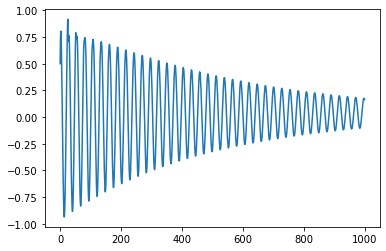

In [18]:
f = 4
fs = 100
t = np.arange(0, 10, 1/fs)
sin_sig = np.cos(2 * np.pi * t * f)
cos_sig = sin_sig[0:26]
ert = karplus_strong(cos_sig, 1000)
plt.plot(ert)

In [16]:
##реверберация звукового сигнала

In [8]:
audio_path1 = 'cath_IR.wav'
ca, sr = librosa.load(audio_path1, sr=44100)

audio_path2 = 'bach_orig.wav'
ca2, sr = librosa.load(audio_path2, sr=44100)

In [11]:
res = scipy.signal.convolve(ca2, ca) 
res

array([-1.0172526e-09,  1.0172526e-09, -1.0172526e-09, ...,
        4.0690105e-09,  1.4241537e-08, -2.4922690e-08], dtype=float32)

In [12]:
Audio(data=res, rate=sr)